In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
transactions = pd.read_csv('store-sales-time-series-forecasting/transactions.csv')
oil = pd.read_csv('store-sales-time-series-forecasting/oil.csv')
holiday_events = pd.read_csv('store-sales-time-series-forecasting/holidays_events.csv')
stores = pd.read_csv('store-sales-time-series-forecasting/stores.csv')
train = pd.read_csv('store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('store-sales-time-series-forecasting/test.csv')

In [10]:
print('\nMissing Values in each Dataset')
print(transactions.isnull().sum())
print(oil.isnull().sum())
print(holiday_events.isnull().sum())
print(stores.isnull().sum())
print(train.isnull().sum())
print(test.isnull().sum())


Missing Values in each Dataset
date            0
store_nbr       0
transactions    0
dtype: int64
date           0
dcoilwtico    43
dtype: int64
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [15]:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')

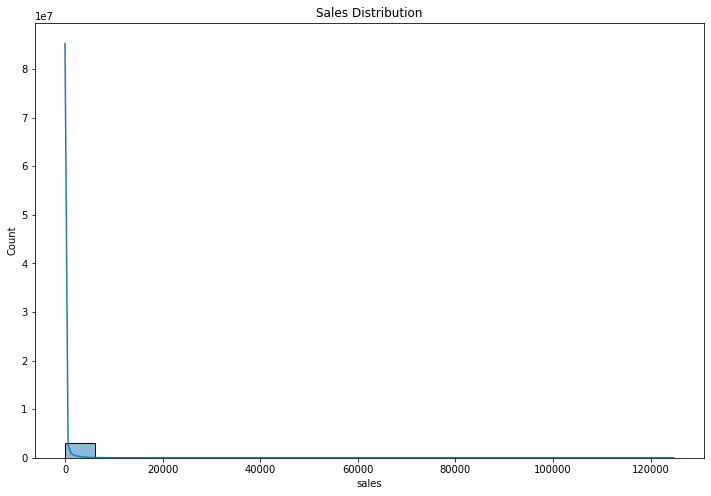

In [14]:
# Histogram of Sales
plt.figure(figsize=(12,8))
sns.histplot(train['sales'], bins = 20, kde = True)
plt.title('Sales Distribution')
plt.show()

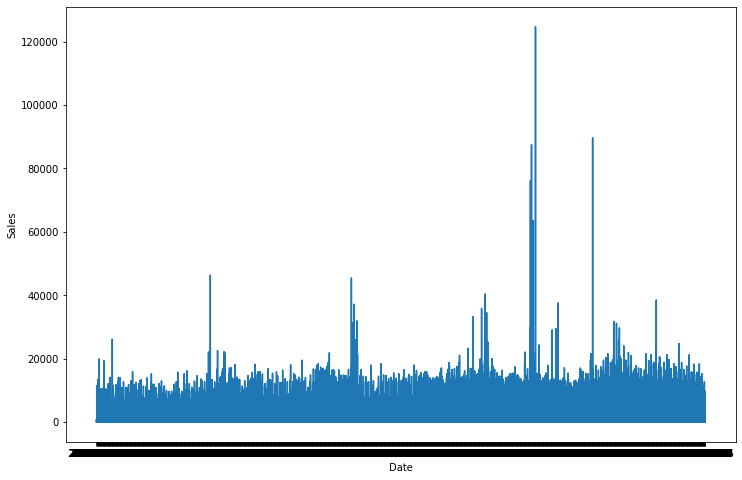

In [17]:
# Time Series Plot of Sales
plt.figure(figsize=(12,8))
plt.plot(train['date'], train['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

Text(0.5, 1.0, 'Sales by Store Number')

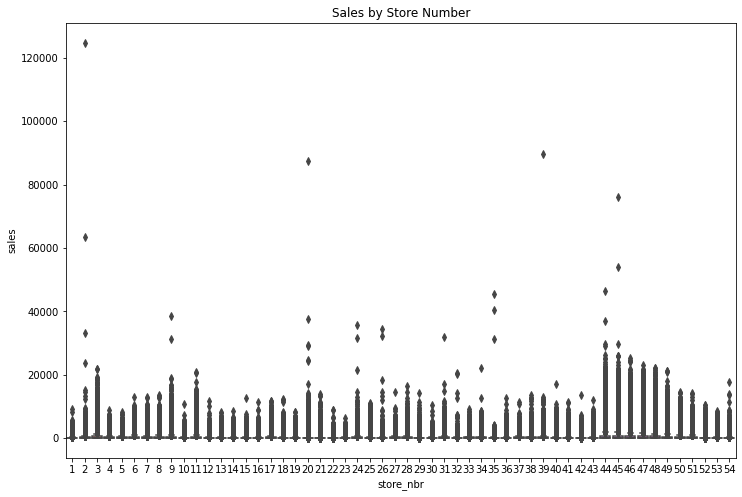

In [24]:
# Count of unique stores
train['store_nbr'].unique().shape

# Sales by Store Number
plt.figure(figsize=(12,8))
sns.boxplot(x = 'store_nbr', y = 'sales', data = train)
plt.title('Sales by Store Number')

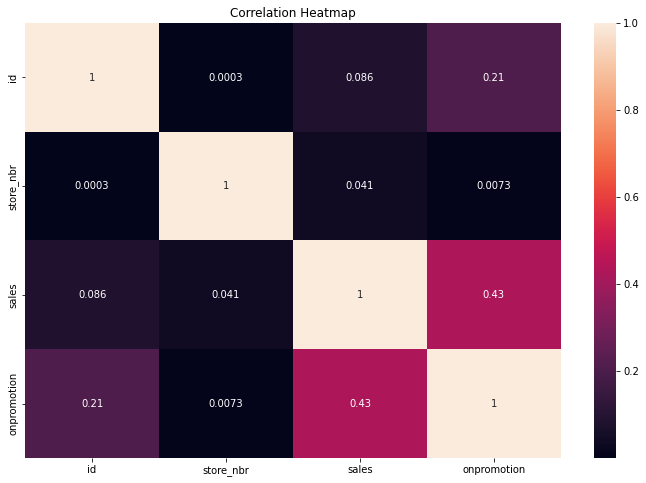

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
# one hot encode 'family'
train = pd.get_dummies(train, columns = ['family'])
train = pd.to_datetime(train['date'])

train.head()

KeyError: "None of [Index(['family'], dtype='object')] are in the [columns]"

In [29]:
train.head()

,id,date,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,0,2013-01-01,1,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2013-01-01,1,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-01-01,1,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2013-01-01,1,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import sklearn.linear_model as lm
import sklearn.metrics as metrics

# Create linear regression object
model = lm.LinearRegression()

# Train the model using the training sets
train_x = train['date'].values.reshape(-1,1)
train_y = train['sales'].values.reshape(-1,1)
model.fit(train_x, train_y)

# Make predictions using the testing set
test_x = test['date'].values.reshape(-1,1)
test_y = test['sales'].values.reshape(-1,1)
pred_y = model.predict(test_x)



ValueError: could not convert string to float: '2013-01-01'